<a href="https://colab.research.google.com/github/rafiff18/Machine-Learning-Ti-2b/blob/main/lanjutan_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:
!pip install scikeras

In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt

In [43]:
np.random.seed(42)
tf.random.set_seed(42)

In [44]:
df = pd.read_csv('concrete_data.csv')
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


,0
Cement,0
Blast Furnace Slag,0
Fly Ash,0
Water,0
Superplasticizer,0
Coarse Aggregate,0
Fine Aggregate,0
Age,0
Strength,0


<Axes: >

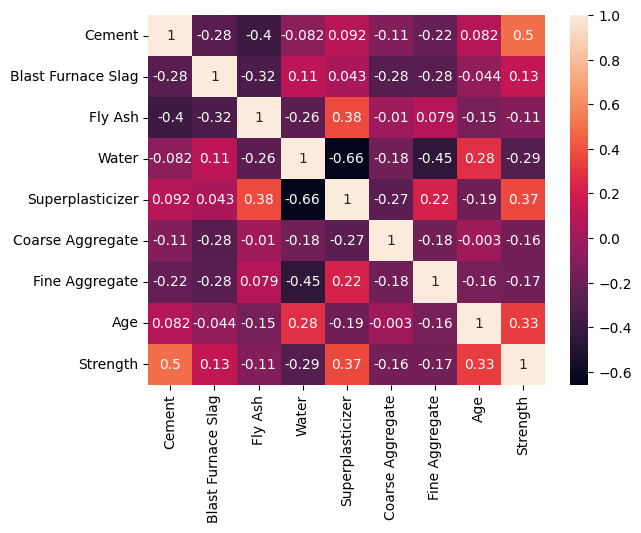

In [45]:
sns.heatmap(df.corr(), annot=True)

In [46]:
X = df.drop('Strength',axis=1)
y = df['Strength']

In [47]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [48]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)


In [49]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [50]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1453.4111 - val_loss: 219.1483
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 184.6236 - val_loss: 175.8680
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 150.7962 - val_loss: 159.2966
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 137.1389 - val_loss: 149.6763
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 127.7259 - val_loss: 143.9125
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 121.2103 - val_loss: 137.0140
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 115.6971 - val_loss: 130.7501
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 110.8468 - val_loss: 124.6955
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 106.3636 - val_loss: 118.3150
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 101.7005 - val_loss: 112.7518
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 95.6900 


In [51]:
model.save("eras_model.keras")

In [52]:
model = keras.models.load_model("eras_model.keras")

In [53]:
X_new = X_test[:3]

In [54]:
model.predict(X_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


array([[52.248013],
       [52.26316 ],
       [64.11237 ]], dtype=float32)

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("era5_model.keras", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("eras_model.keras") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 96.9164 - val_loss: 106.2922
Epoch 2/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 91.7952 - val_loss: 98.9951
Epoch 3/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 86.5024 - val_loss: 91.5060
Epoch 4/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 81.5862 - val_loss: 85.4681
Epoch 5/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 76.9509 - val_loss: 80.4668
Epoch 6/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 72.9198 - val_loss: 76.5199
Epoch 7/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 69.1897 - val_loss: 72.9416
Epoch 8/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 65.7007 - val_loss: 69.4274
Epoch 9/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - loss: 62.3791 - val_loss: 66.6338
Epoch 10/10
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - loss: 58.6972 - val_loss: 63.4569
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 95.6900


In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 96.9164 - val_loss: 106.2922
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 91.7952 - val_loss: 98.9951
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 86.5024 - val_loss: 91.5060
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 81.5862 - val_loss: 85.4681
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 76.9509 - val_loss: 80.4668
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 72.9198 - val_loss: 76.5199
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 69.1897 - val_loss: 72.9416
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 65.7007 - val_loss: 69.4274
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 62.3791 - val_loss: 66.6338
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 58.6972 - val_loss: 63.4569
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 55.7013 - val_loss: 60.8236
Epoch 12/100
19/19 ━━━━━━━━━━

In [57]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [58]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 43.1012 
val/train: 1.16
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 43.1297 - val_loss: 50.5671


In [59]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [60]:
from scikeras.wrappers import KerasRegressor # Instead of tensorflow.keras.wrappers.scikit_learn
keras_reg = KerasRegressor(build_model)

In [61]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])
print(f"KerasRegressor with model: {keras_reg.model_.__class__.__name__}")

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1277.5535 - val_loss: 161.8889
Epoch 2/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 139.9221 - val_loss: 137.3412
Epoch 3/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 122.9540 - val_loss: 129.0252
Epoch 4/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 117.2276 - val_loss: 125.4655
Epoch 5/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 113.7973 - val_loss: 124.0690
Epoch 6/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 111.5492 - val_loss: 121.9909
Epoch 7/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 109.4402 - val_loss: 119.6735
Epoch 8/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 107.3544 - val_loss: 116.8834
Epoch 9/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 105.0648 - val_loss: 113.8435
Epoch 10/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 102.5363 - val_loss: 110.3038
Epoch 11/100
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.6051 - val_loss: 106.5700
Epoch 12/100
19/19 ━━━━━━━━━━━

In [62]:
mse_test = keras_reg.score(X_test, y_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [63]:
print("Test MSE:", mse_test)

Test MSE: 0.8523719722226544


In [64]:
y_pred = keras_reg.predict(X_test)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


klasifikasi

In [65]:
!pip install keras_tuner

In [66]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from scikeras.wrappers import KerasRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras import layers
import keras_tuner as kt

In [68]:
df_star=pd.read_csv('6 class csv.csv')
df_star.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


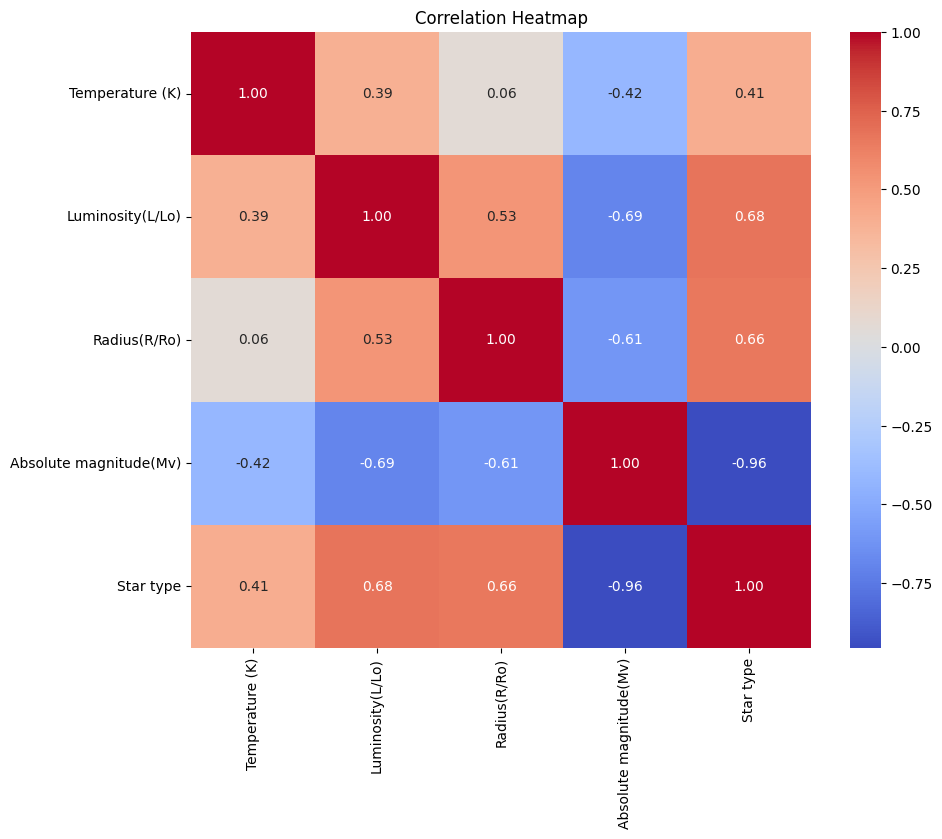

In [69]:
# Ambil hanya kolom numerik
df_num = df_star.select_dtypes(include=['float64', 'int64'])

# Plot heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(df_num.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [76]:
# --- Persiapan Data ---
X = df_star[["Temperature (K)", "Luminosity(L/Lo)", "Radius(R/Ro)", "Absolute magnitude(Mv)"]]
y = df_star["Star type"]


In [77]:
# One-hot encoding untuk label
y_encoded = keras.utils.to_categorical(y, num_classes=6)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [79]:
# Normalisasi fitur
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [80]:
# --- Fungsi untuk Membangun Model ---
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(X_train.shape[1],)))

    # Tambahkan layer tersembunyi dengan jumlah dan unit yang bisa dituning
    for i in range(hp.Int("num_layers", 1, 3)):
        model.add(
            layers.Dense(
                units=hp.Int(f"units_{i}", min_value=32, max_value=256, step=32),
                activation="relu"
            )
        )

    # Output layer
    model.add(layers.Dense(6, activation="softmax"))

    # Kompilasi model
    model.compile(
        optimizer=keras.optimizers.Adam(
            learning_rate=hp.Float("lr", 1e-4, 1e-2, sampling="log")
        ),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

In [81]:
# --- Hyperparameter Tuning ---
tuner = kt.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=5,
    directory="star_tuning",
    project_name="star_classification"
)

# Early stopping
early_stop = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

# Jalankan tuning
tuner.search(X_train_scaled, y_train, validation_split=0.1, epochs=30, callbacks=[early_stop])

# Ambil model terbaik
best_model = tuner.get_best_models(num_models=1)[0]

# Simpan model terbaik saat pelatihan
checkpoint = keras.callbacks.ModelCheckpoint("best_star_model.h5", save_best_only=True)

# Latih ulang model terbaik
history = best_model.fit(
    X_train_scaled, y_train,
    validation_split=0.1,
    epochs=30,
    callbacks=[early_stop, checkpoint],
    verbose=1
)

Reloading Tuner from star_tuning/star_classification/tuner0.json
Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:757: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/6 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 1.0000 - loss: 0.1053

6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 320ms/step - accuracy: 0.9600 - loss: 0.1329 - val_accuracy: 0.9500 - val_loss: 0.1259
Epoch 2/30
4/6 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.9779 - loss: 0.1243 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.9771 - loss: 0.1198 - val_accuracy: 0.9500 - val_loss: 0.1245
Epoch 3/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9711 - loss: 0.1178

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9719 - loss: 0.1163 - val_accuracy: 1.0000 - val_loss: 0.0924
Epoch 4/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9948 - loss: 0.0770 - val_accuracy: 0.9500 - val_loss: 0.1171
Epoch 5/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0772

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 1.0000 - loss: 0.0757 - val_accuracy: 1.0000 - val_loss: 0.0768
Epoch 6/30
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 1.0000 - loss: 0.0690 

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 1.0000 - loss: 0.0688 - val_accuracy: 1.0000 - val_loss: 0.0710
Epoch 7/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 3s 641ms/step - accuracy: 1.0000 - loss: 0.0649

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 1.0000 - loss: 0.0644 - val_accuracy: 1.0000 - val_loss: 0.0689
Epoch 8/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 1.0000 - loss: 0.0595

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0592 - val_accuracy: 1.0000 - val_loss: 0.0688
Epoch 9/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 383ms/step - accuracy: 1.0000 - loss: 0.0493

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 125ms/step - accuracy: 1.0000 - loss: 0.0520 - val_accuracy: 1.0000 - val_loss: 0.0594
Epoch 10/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.0468

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 1.0000 - loss: 0.0493 - val_accuracy: 1.0000 - val_loss: 0.0555
Epoch 11/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0454

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0473 - val_accuracy: 1.0000 - val_loss: 0.0546
Epoch 12/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step - accuracy: 1.0000 - loss: 0.0391

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0427 - val_accuracy: 1.0000 - val_loss: 0.0525
Epoch 13/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 1.0000 - loss: 0.0364

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0401 - val_accuracy: 1.0000 - val_loss: 0.0484
Epoch 14/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0344

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0381 - val_accuracy: 1.0000 - val_loss: 0.0461
Epoch 15/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0314

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0357 - val_accuracy: 1.0000 - val_loss: 0.0449
Epoch 16/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 1.0000 - loss: 0.0292

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 1.0000 - loss: 0.0336 - val_accuracy: 1.0000 - val_loss: 0.0428
Epoch 17/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0271

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0317 - val_accuracy: 1.0000 - val_loss: 0.0406
Epoch 18/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 1.0000 - loss: 0.0253

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0301 - val_accuracy: 1.0000 - val_loss: 0.0390
Epoch 19/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0236

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0285 - val_accuracy: 1.0000 - val_loss: 0.0376
Epoch 20/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0219

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 0.0360
Epoch 21/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 1.0000 - loss: 0.0206

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0256 - val_accuracy: 1.0000 - val_loss: 0.0346
Epoch 22/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 1.0000 - loss: 0.0193

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 1.0000 - loss: 0.0244 - val_accuracy: 1.0000 - val_loss: 0.0334
Epoch 23/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 1.0000 - loss: 0.0181

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0321
Epoch 24/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0170

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 1.0000 - val_loss: 0.0309
Epoch 25/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 1.0000 - loss: 0.0160

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 1.0000 - loss: 0.0212 - val_accuracy: 1.0000 - val_loss: 0.0299
Epoch 26/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 1.0000 - loss: 0.0151

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 1.0000 - loss: 0.0203 - val_accuracy: 1.0000 - val_loss: 0.0289
Epoch 27/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0143

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - accuracy: 1.0000 - loss: 0.0195 - val_accuracy: 1.0000 - val_loss: 0.0280
Epoch 28/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 1s 390ms/step - accuracy: 1.0000 - loss: 0.0135

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 1.0000 - loss: 0.0187 - val_accuracy: 1.0000 - val_loss: 0.0271
Epoch 29/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 1.0000 - loss: 0.0128

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0179 - val_accuracy: 1.0000 - val_loss: 0.0262
Epoch 30/30
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 1.0000 - loss: 0.0121

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 1.0000 - loss: 0.0172 - val_accuracy: 1.0000 - val_loss: 0.0255


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9757 - loss: 0.0399
Test Accuracy: 0.98


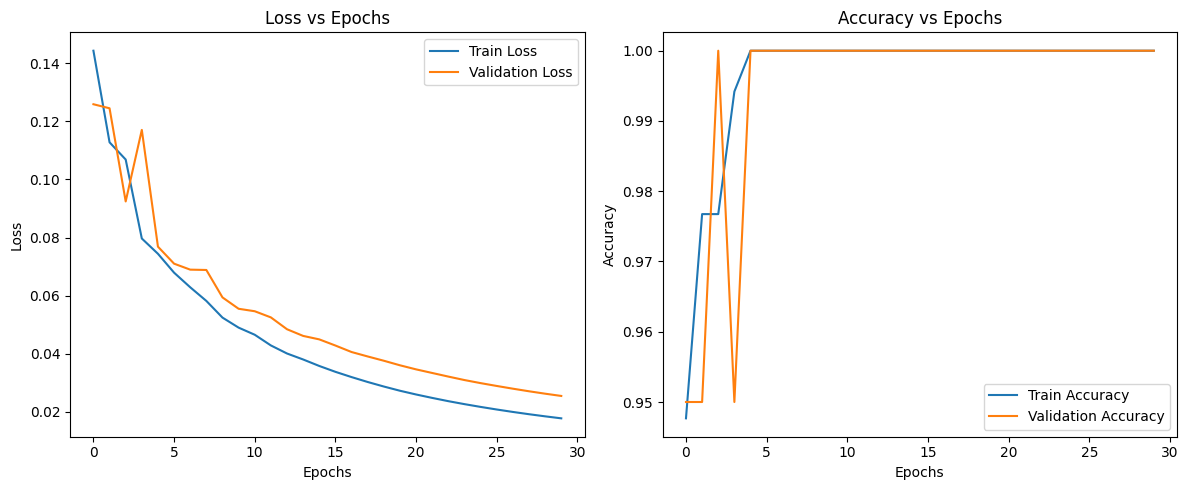

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step


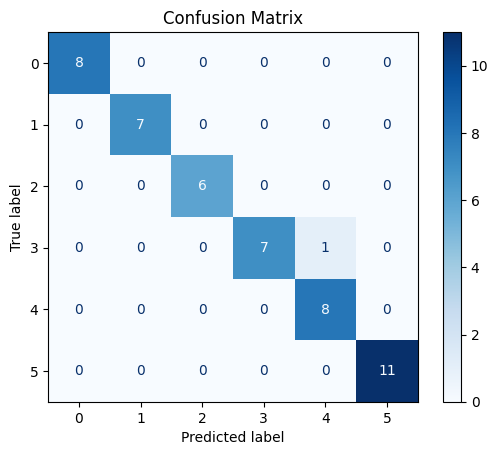

In [82]:
# --- Evaluasi Model ---
loss, acc = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {acc:.2f}")

# --- Visualisasi: Loss & Accuracy ---
plt.figure(figsize=(12, 5))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy vs Epochs")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.tight_layout()
plt.show()

# --- Confusion Matrix ---
y_pred = best_model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix")
plt.show()
